In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
%cd /content/
!pwd

/content
/content


In [ ]:
import pandas as pd
df = pd.read_csv('Steel Dataset_Fe.csv')
df[:8]

,Fe,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,dA,dB,dC,RR,NT,QT,TT,TS,Fatigue min,Fatigue max
0,98.593,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0,0.08,0.00,0.0,1740,865,865,600,656,326,542
1,98.593,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0,0.08,0.00,0.0,1740,865,865,600,656,318,527
2,98.593,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0,0.08,0.00,0.0,1740,865,865,600,656,333,505
3,98.602,0.33,0.26,0.74,0.013,0.015,0.01,0.02,0.01,0.0,0.08,0.02,0.0,1270,865,865,600,733,338,597
4,98.602,0.33,0.26,0.74,0.013,0.015,0.01,0.02,0.01,0.0,0.08,0.02,0.0,1270,865,865,600,733,342,603
5,98.602,0.33,0.26,0.74,0.013,0.015,0.01,0.02,0.01,0.0,0.08,0.02,0.0,1270,865,865,600,733,347,620
6,98.575,0.37,0.24,0.72,0.015,0.020,0.02,0.02,0.02,0.0,0.10,0.00,0.0,1740,865,865,550,780,330,603
7,98.575,0.37,0.24,0.72,0.015,0.020,0.02,0.02,0.02,0.0,0.10,0.00,0.0,1740,865,865,550,780,332,616


# Check Data

In [ ]:
df.head()

,Fe,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,dA,dB,dC,RR,NT,QT,TT,TS,Fatigue min,Fatigue max
0,98.593,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0,0.08,0.00,0.0,1740,865,865,600,656,326,542
1,98.593,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0,0.08,0.00,0.0,1740,865,865,600,656,318,527
2,98.593,0.34,0.26,0.74,0.012,0.015,0.01,0.02,0.01,0.0,0.08,0.00,0.0,1740,865,865,600,656,333,505
3,98.602,0.33,0.26,0.74,0.013,0.015,0.01,0.02,0.01,0.0,0.08,0.02,0.0,1270,865,865,600,733,338,597
4,98.602,0.33,0.26,0.74,0.013,0.015,0.01,0.02,0.01,0.0,0.08,0.02,0.0,1270,865,865,600,733,342,603


In [ ]:
df.shape

(291, 20)

In [ ]:
X = df.drop(columns= ['TS', 'Fatigue min', 'Fatigue max']).values # use all features [Cu, Fe, P, Ni, Si, Mg, Zn, Sn, Cr, Zr, RE]
y = df[['TS', 'Fatigue min', 'Fatigue max']].values # 3 output (UTS and EC)

In [ ]:
X[:5]

array([[9.8593e+01, 3.4000e-01, 2.6000e-01, 7.4000e-01, 1.2000e-02,
        1.5000e-02, 1.0000e-02, 2.0000e-02, 1.0000e-02, 0.0000e+00,
        8.0000e-02, 0.0000e+00, 0.0000e+00, 1.7400e+03, 8.6500e+02,
        8.6500e+02, 6.0000e+02],
       [9.8593e+01, 3.4000e-01, 2.6000e-01, 7.4000e-01, 1.2000e-02,
        1.5000e-02, 1.0000e-02, 2.0000e-02, 1.0000e-02, 0.0000e+00,
        8.0000e-02, 0.0000e+00, 0.0000e+00, 1.7400e+03, 8.6500e+02,
        8.6500e+02, 6.0000e+02],
       [9.8593e+01, 3.4000e-01, 2.6000e-01, 7.4000e-01, 1.2000e-02,
        1.5000e-02, 1.0000e-02, 2.0000e-02, 1.0000e-02, 0.0000e+00,
        8.0000e-02, 0.0000e+00, 0.0000e+00, 1.7400e+03, 8.6500e+02,
        8.6500e+02, 6.0000e+02],
       [9.8602e+01, 3.3000e-01, 2.6000e-01, 7.4000e-01, 1.3000e-02,
        1.5000e-02, 1.0000e-02, 2.0000e-02, 1.0000e-02, 0.0000e+00,
        8.0000e-02, 2.0000e-02, 0.0000e+00, 1.2700e+03, 8.6500e+02,
        8.6500e+02, 6.0000e+02],
       [9.8602e+01, 3.3000e-01, 2.6000e-01, 7.4000e-

In [ ]:
y[:5]

array([[656, 326, 542],
       [656, 318, 527],
       [656, 333, 505],
       [733, 338, 597],
       [733, 342, 603]])

In [ ]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=72)

# Training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[17,]),
    tf.keras.layers.Dense(247, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(487, activation='relu'),
    tf.keras.layers.Dense(3)
    ])



model.compile(loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(0.0001))


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=5,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-4)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      verbose=1, 
                                                      patience = 3)                                               

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 17)                0         
_________________________________________________________________
dense (Dense)                (None, 247)               4446      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               126976    
_________________________________________________________________
dense_2 (Dense)              (None, 487)               249831    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1464      
Total params: 382,717
Trainable params: 382,717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    x=X_train,
    y=y_train, 
    batch_size=25, 
    epochs=50,
    validation_split=0.2,
    verbose=0,
    callbacks=[reduce_lr, early_stopping])

Epoch 00007: early stopping


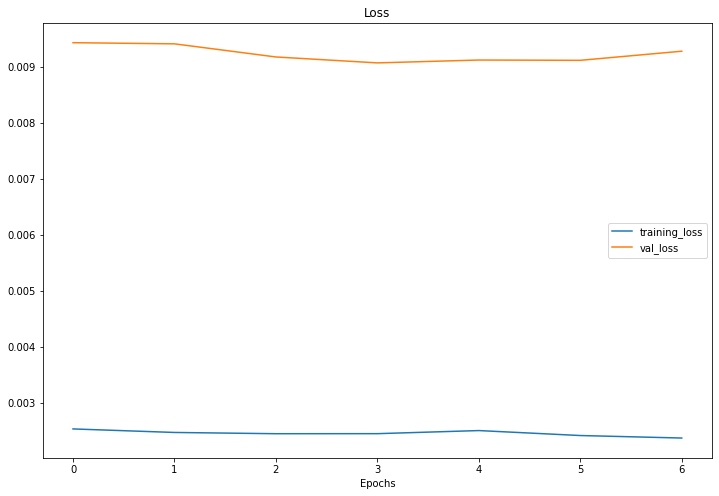

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(history.history['loss']))
plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xticks(np.arange(0, len(history.history['loss']), step = 1))
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
print(f'Lowest training loss is: {min(loss)} on epoch: {loss.index(min(loss)) - 1}')
print(f'Lowest validation loss is: {min(val_loss)} on epoch: {val_loss.index(min(val_loss)) - 1}')

Lowest training loss is: 0.0025471283588558435 on epoch: 2
Lowest validation loss is: 0.009327358566224575 on epoch: -1


In [ ]:
pd.DataFrame(history.history)

,loss,val_loss,lr
0,0.003264,0.009695,0.0001
1,0.003271,0.009691,0.0001
2,0.003232,0.009701,0.0001
3,0.003151,0.009731,0.0001
4,0.003020,0.009648,0.0001
5,0.003024,0.009803,0.0001
6,0.003056,0.009648,0.0001
7,0.002930,0.009515,0.0001
8,0.002892,0.009509,0.0001
9,0.002860,0.009574,0.0001


# Evaluate and Predict

In [ ]:
# evaluate
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0107


0.010729442350566387

In [ ]:
pred = model.predict(X_test)
pred[:5]

array([[0.21568084, 0.04196165, 0.32192048],
       [0.03752285, 0.15979335, 0.1553415 ],
       [0.1708718 , 0.32085872, 0.16029054],
       [0.22890355, 0.3612944 , 0.25873485],
       [0.08274309, 0.13094036, 0.05333706]], dtype=float32)

## Inverse Transform normalized data

In [ ]:
unnormalize_pred = scaler.inverse_transform(pred)
unnormalize_pred[:8]

array([[ 936.81647,  250.81401,  765.82446],
       [ 704.8548 ,  342.9584 ,  607.57446],
       [ 878.4751 ,  468.9115 ,  612.27606],
       [ 954.0324 ,  500.5322 ,  705.7981 ],
       [ 763.7315 ,  320.39536,  510.6702 ],
       [ 950.6926 ,  535.28436,  708.52295],
       [1326.2548 ,  716.15845,  959.9195 ],
       [ 797.7572 ,  377.60486,  551.39996]], dtype=float32)

In [ ]:
true_y_test = scaler.inverse_transform(y_test)

In [ ]:
true_y_test[:8]

array([[ 943.,  249.,  765.],
       [ 730.,  340.,  599.],
       [ 892.,  460.,  600.],
       [ 989.,  500.,  700.],
       [ 985.,  410.,  500.],
       [1010.,  540.,  700.],
       [1260.,  890., 1260.],
       [ 700.,  340.,  460.]])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
mean_squared_error(true_y_test,unnormalize_pred)**0.5

99.89495427578834

In [ ]:
r2_score(true_y_test,unnormalize_pred)

0.8008582546041204

# Predicting algorithm

In [ ]:
# make class predictions with the model
ynew = model.predict(X)

# summarize the first 8 cases
ypred = scaler.inverse_transform(ynew)
yreal = scaler.inverse_transform(y)


for i in range(8):
	print("Predicted=%s (Expected %s)" % (ypred[i], yreal[i]))


Predicted=[674.5913  335.79602 557.7352 ] (Expected [656. 326. 542.])
Predicted=[674.5913  335.79602 557.7352 ] (Expected [656. 318. 527.])
Predicted=[674.5913  335.79602 557.7352 ] (Expected [656. 333. 505.])
Predicted=[731.08057 346.14844 599.6474 ] (Expected [733. 338. 597.])
Predicted=[731.08057 346.14844 599.6474 ] (Expected [733. 342. 603.])
Predicted=[731.08057 346.14844 599.6474 ] (Expected [733. 347. 620.])
Predicted=[752.0705  378.50485 635.64886] (Expected [780. 330. 603.])
Predicted=[752.0705  378.50485 635.64886] (Expected [780. 332. 616.])
